In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

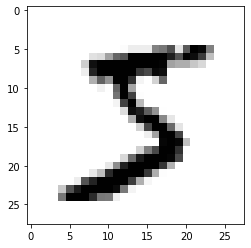

In [7]:


some_digit =X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")

In [5]:
y[0]

'5'

In [17]:

y = y.astype(np.uint8)
y[0]

5

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape

(60000, 784)

In [19]:
y_train = y_train.astype(np.uint8)

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [9]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [10]:


sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:



cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
y_train_pred


array([ True, False, False, ...,  True, False, False])

In [15]:

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:


precision_score (y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred), f1_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311, 0.7325171197343846)

In [17]:
y_scores = sgd_clf.decision_function([some_digit])

In [18]:
y_scores

array([2164.22030239])

In [19]:
threshold = 8000
    

In [20]:
y_some_digit_pred = (y_scores > threshold)

In [21]:
y_some_digit_pred

array([False])

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [45]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [23]:


precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

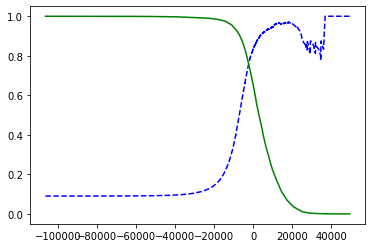

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

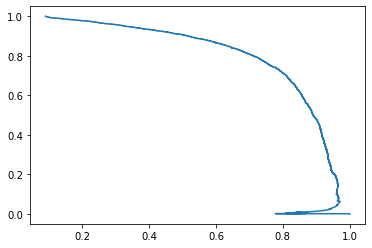

In [26]:
plt.plot(precisions, recalls)

In [30]:


fpr , tpr , thresholds = roc_curve(y_train_5, y_scores)

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    

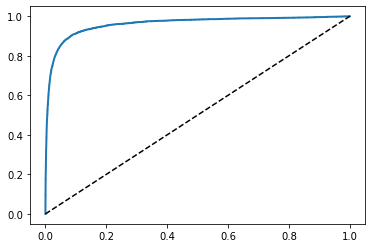

In [40]:
plot_roc_curve(fpr, tpr)
plt.show()

In [41]:


forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [42]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [47]:
y_scores_forest = y_probas_forest[:, 1]

fpr_forest, tpr_forest , threshold_forest = roc_curve(y_train_5, y_scores_forest)

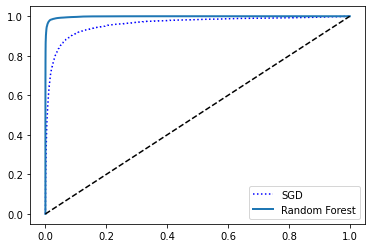

In [49]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [53]:

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [56]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [59]:
roc_auc_score(y_train_5, y_train_pred_forest)

0.9327181722735077

In [60]:


svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [61]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [63]:
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [64]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [10]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [12]:
sgd_clf = SGDClassifier(random_state=42)
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

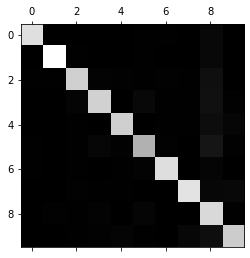

In [13]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [14]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

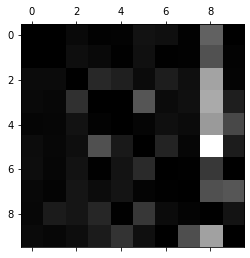

In [15]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [21]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [22]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [23]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [35]:
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train+noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test+noise
y_train_mod = X_train
y_test_mod = X_test

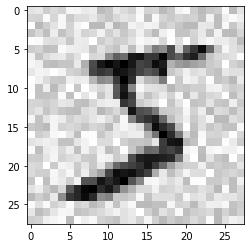

In [29]:
plt.imshow(X_train_mod[0].reshape(28,28), cmap="binary")

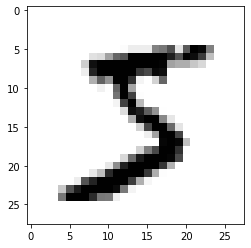

In [32]:
plt.imshow(X_train[0].reshape(28,28), cmap="binary")

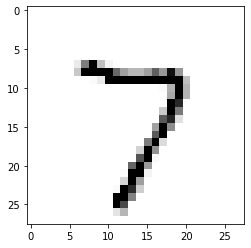

In [38]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plt.imshow(clean_digit.reshape(28,28), cmap="binary")